In [25]:
# fPtr = open('TomSawyer.txt', 'r')

# # print (fPtr.read())



In [ ]:
# fPtr.close()

In [30]:
# fPtr = open('TomSawyer.txt', 'r')
# token=0
# for line in fPtr:
#     fields = line.split(' ')
# #     print(fields)
#     token = token + len(fields)
# #     print (line)
# print(token)

76151


In [1]:
# Assumption: Not considred "," , "'", ".", "-" etc. as separate tokens.  
# Removed next line characters from the sentences.
# Considered space as delimeter to separate the tokens

fPtr = open('TomSawyer.txt', 'r')
count_word=0
dwords=[]
for line in fPtr:
    if line.rstrip():
        token = line.split(' ')
        dwords.extend(token)
#         print(token)
        count_word = count_word + len(token)
print('Token Count = ',count_word)
wordfreq = {}
for word in dwords:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
print (wordfreq)
type=set(dwords)
# print(dwords)
# print(type)
count_dword = len(type)
print('Type Count = ',count_dword)
TTR= count_dword/count_word
print('TTR=', TTR)

Token Count =  73869
{'The': 389, 'Project': 68, 'Gutenberg': 19, 'EBook': 1, 'of': 1453, 'Adventures': 4, 'Tom': 436, 'Sawyer,': 8, 'Complete': 1, 'by\n': 16, 'Mark': 4, 'Twain': 3, '(Samuel': 4, 'Clemens)\n': 4, 'This': 53, 'eBook': 5, 'is': 136, 'for': 474, 'the': 3181, 'use': 20, 'anyone': 3, 'anywhere': 7, 'at': 320, 'no': 139, 'cost': 3, 'and': 2687, 'with': 624, 'almost\n': 2, 'restrictions': 2, 'whatsoever.': 2, 'You': 61, 'may': 25, 'copy': 7, 'it,': 120, 'give': 40, 'it': 603, 'away': 69, 'or': 195, 're-use\n': 2, 'under': 82, 'terms': 20, 'License': 8, 'included': 2, 'this\n': 12, 'online': 4, 'www.gutenberg.net\n': 2, 'Title:': 1, 'Complete\n': 1, 'Author:': 1, 'Release': 1, 'Date:': 1, 'August': 1, '20,': 1, '2006': 1, '[EBook': 1, '#74]\n': 1, 'Last': 2, 'Updated:': 1, 'February': 1, '23,': 1, '2018\n': 1, 'Language:': 1, 'English\n': 1, 'Character': 1, 'set': 29, 'encoding:': 1, 'UTF-8\n': 1, '***': 3, 'START': 1, 'OF': 11, 'THIS': 5, 'PROJECT': 4, 'GUTENBERG': 3, 'EBOOK

Token Count =  73869
Type Count =  14179
TTR= 0.1919479077826964


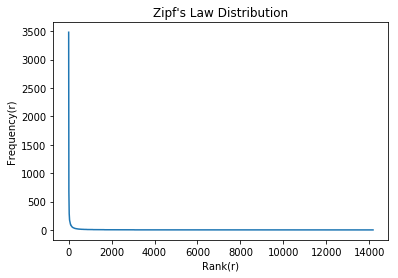

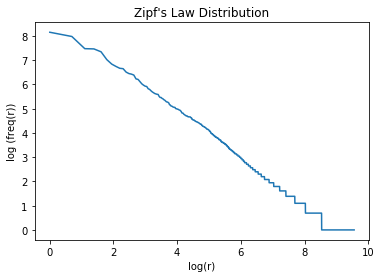

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

fPtr = open('TomSawyer.txt', 'r')
count_word=0
dwords=[]

# Counting tokens
for line in fPtr:
    if line.rstrip():
        token = line.strip('\n').split(' ')
#         token.strip('\n')
        dwords.extend(token)
#         print(token)
        count_word = count_word + len(token)
print('Token Count = ',count_word)

# Counting distinct word frequency
dwordfreq = {}
for word in dwords:
    dwordfreq[word] = dwordfreq.setdefault(word, 0) + 1
# print (dwordfreq)


# total number of distinct words
count_dword = len(dwordfreq)
print('Type Count = ',count_dword)

# TTR
TTR= count_dword/count_word
print('TTR=', TTR)

# Sorting words in dictionary based on their frequency in decreasing order
items = [(v, k) for k, v in dwordfreq.items()]
items.sort()
items.reverse()
items = [(k, v) for v, k in items]
# print(items)
# This result of dictionary word frequency states that the word which are smaller in length are the most frequent words. 
# In termsof meaning, we can check that the words having large number of meanings have large frequencies.


# Plotting Zipfs Law Distribution
x = np.arange(1, count_dword + 1)
y = [v for k,v in items]
# print(x)
# print(y)

plt.plot(x,y)
plt.xlabel('Rank(r)')
plt.ylabel('Frequency(r)')
plt.title('Zipf\'s Law Distribution')
plt.show()



# log plot of Zipf's Distribution

plt.plot(np.log(x),np.log(y))
plt.xlabel('log(r)')
plt.ylabel('log (freq(r))')
plt.title('Zipf\'s Law Distribution')
plt.show()

Token Count =  73869
Type Count =  14179
TTR= 0.1919479077826964


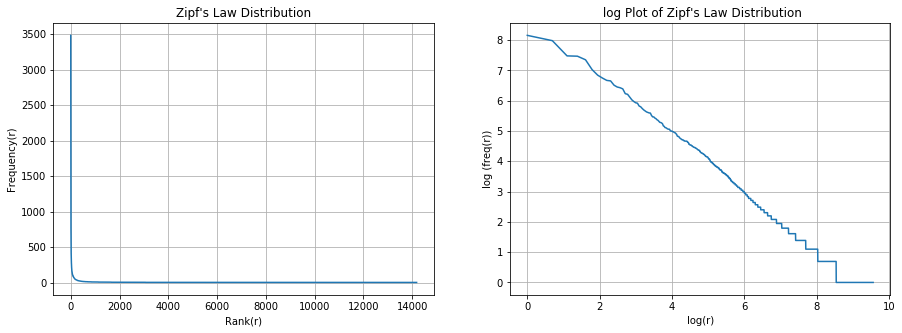

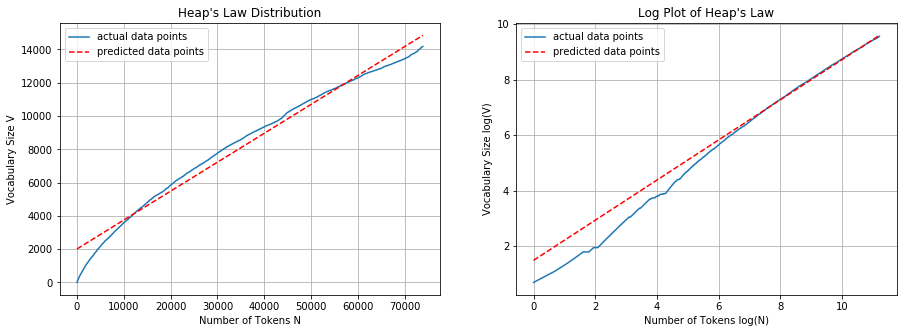

slope, beta = [ 0.72270208]
intercept, K = 4.43294721692


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets, linear_model
from sklearn import model_selection
import pandas as pd

fPtr = open('TomSawyer.txt', 'r')
count_word=0
count_word_list=[]  
dword_freq_list = []
words=[]

# Counting tokens
for line in fPtr:
    if line.rstrip():
        for token in line.strip('\n').split(' '):
#             print(token)
            words.append(token)
            count_word = count_word + 1
            count_word_list.append(count_word)
# print(count_word_list)
# print(words)
# Counting distinct word frequency
dwordfreq = {}
for word in words:
    dwordfreq[word] = dwordfreq.setdefault(word, 0) + 1
    dword_freq_list.append(dwordfreq[word])
# print (dword_freq_list)


print('Token Count = ', count_word)
# total number of distinct words
count_dword = len(dwordfreq)
print('Type Count = ',count_dword)
# TTR
TTR= count_dword/count_word
print('TTR=', TTR)



dword_freq_list [0] = 0   
# print(dword_freq_list)
for x in range(0, len(dword_freq_list), 1):
    if dword_freq_list[x] == 1 :
        dword_freq_list[x] = dword_freq_list[x-1] + 1
    else:
        dword_freq_list[x] = dword_freq_list[x-1] + 0



# Sorting words in dictionary based on their frequency in decreasing order
items = [(v, k) for k, v in dwordfreq.items()]
items.sort()
items.reverse()
items = [(k, v) for v, k in items]
# print(items)
# This result of dictionary word frequency states that the word which are smaller in length are the most frequent words. 
# In termsof meaning, we can check that the words having large number of meanings have large frequencies.



keyitem= [k for k,v in items]

fig=plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
# Plotting Zipfs Law Distribution
x = np.arange(1, count_dword + 1)
y = [v for k,v in items]
# print(x)
# print(y)


plt.plot(x,y)
plt.xlabel('Rank(r)')
plt.ylabel('Frequency(r)')
plt.title('Zipf\'s Law Distribution')
plt.grid()


# log plot of Zipf's Law
plt.subplot(1,2,2)
plt.plot(np.log(x),np.log(y))
plt.xlabel('log(r)')
plt.ylabel('log (freq(r))')
plt.title(' log Plot of Zipf\'s Law Distribution')
plt.grid()
plt.show()



# print(count_word_list)
# print(dword_freq_list)

# Heap's Law Distribution
X1 = np.log(count_word_list)
y1 = np.log(dword_freq_list)
X=count_word_list
y=dword_freq_list

X = np.array(X).reshape((len(X), 1))
X1 = np.array(X1).reshape((len(X1), 1))

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X,y)
y_pred = reg.predict(X)



fig=plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
# Heap's Law Plot
plt.plot(X, y, label='actual data points')
plt.plot(X, y_pred, 'r--', label='predicted data points')
plt.xlabel('Number of Tokens N')
plt.ylabel('Vocabulary Size V')
plt.title('Heap\'s Law Distribution')
plt.grid()
plt.legend()


reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(X1,y1)
y1_pred = reg.predict(X1)


plt.subplot(1,2,2)
# Log Plot of Heap's Law
plt.plot(X1, y1, label='actual data points')
plt.plot(X1, y1_pred, 'r--', label='predicted data points')
plt.xlabel('Number of Tokens log(N)')
plt.ylabel('Vocabulary Size log(V)')
plt.title('Log Plot of Heap\'s Law')
plt.legend()
plt.grid()
plt.show()

slope = reg.coef_
intercept = reg.intercept_
print('slope, beta =', slope)
print('intercept, K =',np.exp(intercept))




In [11]:
import theano

ModuleNotFoundError: No module named 'theano'